#Recognition of Phlebology Diseases Based on Photographs

In [ ]:
!pip install opencv-python==4.5.5.64

     |████████████████████████████████| 60.5 MB 62.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!python --version

Python 3.7.13


In [ ]:
!apt install subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 subversion
0 upgraded, 5 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,237 kB of archives.
After this operation, 9,910 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libapr1 amd64 1.6.3-2 [90.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libaprutil1 amd64 1.6.1-2 [84.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libserf-1-1 amd64 1.3.9-6 [44.4 kB]
Get:4 http://archive.ubuntu.co

In [ ]:
!svn checkout https://github.com/ishitharaj/newCVIdata/trunk/CVI_newdataset/

A    CVI_newdataset/square3class
A    CVI_newdataset/square3class/1
A    CVI_newdataset/square3class/1/0001cls1.jpg
A    CVI_newdataset/square3class/1/0001cls2.jpg
A    CVI_newdataset/square3class/1/0002cls1.jpg
A    CVI_newdataset/square3class/1/0002cls2.jpg
A    CVI_newdataset/square3class/1/0003cls1.jpg
A    CVI_newdataset/square3class/1/0003cls2.jpg
A    CVI_newdataset/square3class/1/0004cls1.jpg
A    CVI_newdataset/square3class/1/0004cls2.jpg
A    CVI_newdataset/square3class/1/0005cls1.jpg
A    CVI_newdataset/square3class/1/0005cls2.jpg
A    CVI_newdataset/square3class/1/0006cls1.jpg
A    CVI_newdataset/square3class/1/0006cls2.jpg
A    CVI_newdataset/square3class/1/0007cls1.jpg
A    CVI_newdataset/square3class/1/0007cls2.jpg
A    CVI_newdataset/square3class/1/0008cls1.jpg
A    CVI_newdataset/square3class/1/0008cls2.jpg
A    CVI_newdataset/square3class/1/0009cls1.jpg
A    CVI_newdataset/square3class/1/0009cls2.jpg
A    CVI_newdataset/square3class/1/0010cls1.jpg
A    CVI_newdataset/

In [ ]:
from glob import glob
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import math
from skimage.io import imread
import cv2 as cv2
from tqdm import tqdm

In [ ]:
data_filtered = "/content/CVI_newdataset/square3class"
classes = ['1', '2', '3']

In [ ]:
class1images = glob(data_filtered+'/'+'1'+'/'+'*')
class2images = glob(data_filtered+'/'+'2'+'/'+'*')
class3images = glob(data_filtered+'/'+'3'+'/'+'*')

In [ ]:
#train val test split
class_1 = os.listdir(data_filtered+'/1')
class_2 = os.listdir(data_filtered+'/2')
class_3 = os.listdir(data_filtered+'/3')

for i in range(1,4):
    for t in ["train", "test"]:
        !mkdir -p /content/CVI_newdataset/square3class/{t}/{i}/

base_path = data_filtered
for i in range(0, len(class_1)):
  filename = class_1[i]
  if i <= 45:
    shutil.copy(f"{base_path}/1/{filename}", f"{base_path}/train/1/{filename}")
  else:
    shutil.copy(f"{base_path}/1/{filename}", f"{base_path}/test/1/{filename}")

for i in range(0, len(class_2)):
  filename = class_2[i]
  if i <= 43:
    shutil.copy(f"{base_path}/2/{filename}", f"{base_path}/train/2/{filename}")
  else:
    shutil.copy(f"{base_path}/2/{filename}", f"{base_path}/test/2/{filename}")

for i in range(0, len(class_3)):
  filename = class_3[i]
  if i <= 91:
    shutil.copy(f"{base_path}/3/{filename}", f"{base_path}/train/3/{filename}")
  else:
    shutil.copy(f"{base_path}/3/{filename}", f"{base_path}/test/3/{filename}")

In [ ]:
len(class1images), len(class2images), len(class3images)

(59, 57, 105)

In [ ]:
#load image paths
def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(imread(path))
    return tmp

In [ ]:
#plot images
def plot_any(arr, title = ''):
    plt.figure(figsize = (15, 25))
    for i in range(len(arr)):
        plt.subplot(1,len(arr),i + 1)
        plt.title(title)
        plt.imshow(arr[i]);

In [ ]:
load_class1images = load_images(class1images[:5])
load_class2images = load_images(class2images[:5])
load_class3images = load_images(class3images[:5])

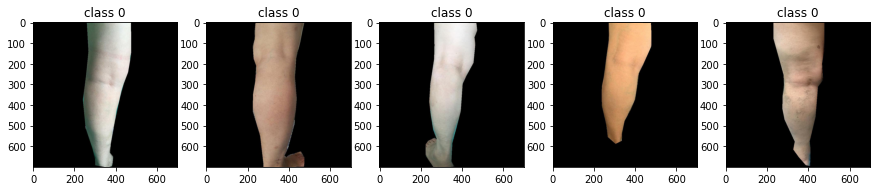

In [ ]:
plot_any(load_class1images, 'class 0')

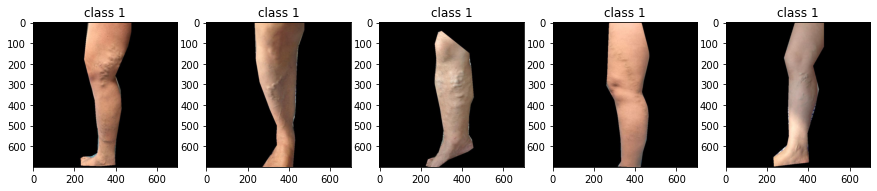

In [ ]:
plot_any(load_class2images, 'class 1')

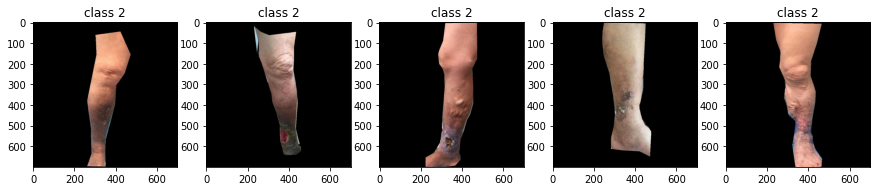

In [ ]:
plot_any(load_class3images, 'class 2')

In [ ]:
cv2.__version__

'4.5.5'

In [ ]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    SIZE = (140, 140)
    X = []
    y = []
    for folderName in os.listdir(folder):
      if folderName in   ['1']:
        label = 0
      if folderName in   ['2']:
        label = 1
      if folderName in   ['3']:
        label = 2
      for image_filename in tqdm(os.listdir(folder + '/' + folderName)):
        path = folder + '/' + folderName + '/' + image_filename
        img = cv2.imread(path)
        img = cv2.resize(img, SIZE, interpolation=cv2.INTER_AREA)
        X.append(img)
        y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)

    return X,y

In [ ]:
(x_train, y_train) = get_data('/content/CVI_newdataset/square3class/train')

100%|██████████| 46/46 [00:00<00:00, 51.75it/s]


In [ ]:
(x_test, y_test) = get_data('/content/CVI_newdataset/square3class/test')

100%|██████████| 13/13 [00:00<00:00, 70.80it/s]


In [ ]:
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (182, 140, 140, 3) - y_train shape: (182,)
x_test shape: (39, 140, 140, 3) - y_test shape: (39,)


In [ ]:
y_train.ndim

1

## Image classification with Vision Transformer(ViT)

### The ViT model applies the Transformer architecture with self-attention to sequences of image patches, without using convolution layers.

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.9 MB/s 


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import PIL
from PIL import Image

In [ ]:
#image dimensions
print(PIL.Image.open(class1images[0]).size)

(700, 700)


In [ ]:
batch_size = 4
img_height = 140
img_width = 140

In [ ]:
num_classes = 3
input_shape = (140, 140, 3)

## Configure the hyperparameters

In [ ]:
learning_rate = 0.00001
weight_decay = 0.00001
batch_size = 4
num_epochs = 100
image_size = 140  # We'll resize input images to this size
patch_size = 3  #6 # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [1024, 128]  # Size of the dense layers of the final classifier

## Use data augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

## Implement multilayer perceptron (MLP)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

## Implement patch creation as a layer

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

patches of a sample image

Image size: 140 X 140
Patch size: 3 X 3
Patches per image: 2116
Elements per patch: 27


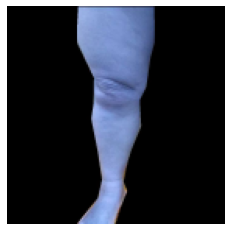

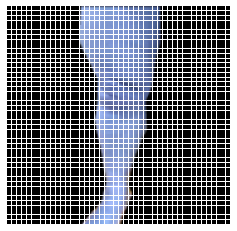

In [ ]:
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

## Implement the patch encoding layer

The PatchEncoder layer will linearly transform a patch by projecting it into a vector of size projection_dim. In addition, it adds a learnable position embedding to the projected vector.

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

## Build the ViT model

The ViT model consists of multiple Transformer blocks, which use the layers.MultiHeadAttention layer as a self-attention mechanism applied to the sequence of patches. The Transformer blocks produce a [batch_size, num_patches, projection_dim] tensor, which is processed via an classifier head with softmax to produce the final class probabilities output.

Unlike the technique described in the paper, which prepends a learnable embedding to the sequence of encoded patches to serve as the image representation, all the outputs of the final Transformer block are reshaped with layers.Flatten() and used as the image representation input to the classifier head. Note that the layers.GlobalAveragePooling1D layer could also be used instead to aggregate the outputs of the Transformer block, especially when the number of patches and the projection dimensions are large.

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

## Compile, train, and evaluate the mode

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )
    if not os.path.exists("/content/tmp"):
      os.mkdir("/content/tmp")
    checkpoint_filepath = "/content/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/100
41/41 [==============================] - 44s 761ms/step - loss: 2.7000 - accuracy: 0.4356 - top-5-accuracy: 1.0000 - val_loss: 6.7896 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 1.0000
Epoch 2/100
41/41 [==============================] - 23s 556ms/step - loss: 2.5350 - accuracy: 0.4110 - top-5-accuracy: 1.0000 - val_loss: 1.9889 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 1.0000
Epoch 3/100
41/41 [==============================] - 23s 571ms/step - loss: 2.3025 - accuracy: 0.4479 - top-5-accuracy: 1.0000 - val_loss: 3.6700 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 1.0000
Epoch 4/100
41/41 [==============================] - 23s 563ms/step - loss: 1.8945 - accuracy: 0.4294 - top-5-accuracy: 1.0000 - val_loss: 2.2397 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 1.0000
Epoch 5/100
41/41 [==============================] - 23s 558ms/step - loss: 1.9087 - accuracy: 0.3926 - top-5-accuracy: 1.0000 - val_loss: 1.6207 - val_accuracy: 0.0000e+00 - val_top-5-accurac

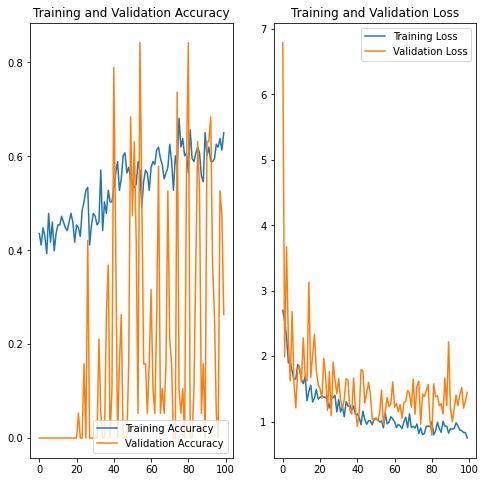

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()